In [39]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10,10))
mpl.rc('image', cmap='gray')

In [40]:
pip install pims

Note: you may need to restart the kernel to use updated packages.


In [41]:
pip install trackpy

Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [43]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp
import cv2
import math
import scipy
from numpy import array, exp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt 

In [44]:
@pims.pipeline
def gray(image):
    return image[:, :, 1]  

frames = gray(pims.Video(r'/Users/rohan/Desktop/college/surge/temp-06182023105454-0000.avi'))

In [45]:
len(frames)

4024

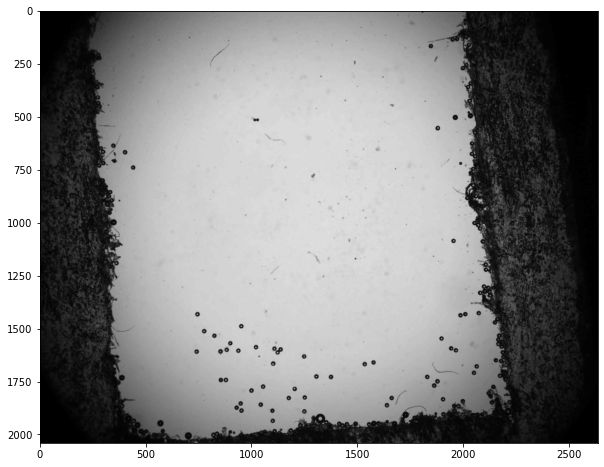

In [46]:
plt.imshow(frames[0])

In [49]:
binary_frames = np.zeros((len(frames),471,500))

MemoryError: Unable to allocate 7.06 GiB for an array with shape (4024, 471, 500) and data type float64

In [51]:
for i in range(len(frames)):
    ret, binary_frame = cv2.threshold(frames[i], 150, 255, cv2.THRESH_BINARY)
    resized_binary_frame = cv2.resize(binary_frame, (500,471))
    binary_frames[i] = resized_binary_frame

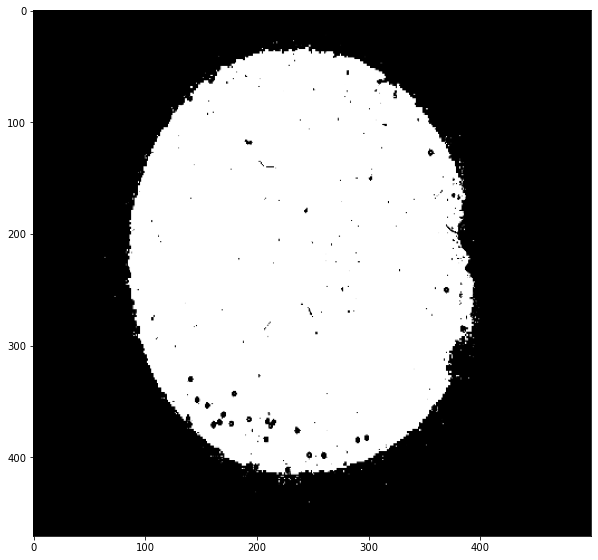

In [52]:
plt.imshow(binary_frames[0])

In [53]:
f = tp.batch(binary_frames[::],23, invert=True, minmass=100 ); 

Frame 4023: 46 features


deprecated pixel format used, make sure you did set range correctly
 (repeated 10288 more times)


In [54]:
f.head(50)

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
0,31.164895,231.729580,13043.225868,6.705206,0.476094,104.893075,-23066.0,16.069294,0
1,55.645756,281.483395,1730.279683,1.787321,0.077831,147.762419,-93746.0,-0.168223,0
2,57.674891,157.219387,12975.729454,6.344740,0.166878,140.465509,-27578.0,-3.113122,0
3,60.047876,318.225261,13374.323140,6.760177,0.100296,167.828920,-30861.0,-1.666039,0
4,70.611314,251.131387,499.838306,1.465541,0.086936,67.496414,-95204.0,-0.164788,0
5,76.112954,135.481379,11878.456676,6.489367,0.245209,139.553396,-27194.0,-3.465162,0
6,80.988700,347.143880,11461.620717,6.539794,0.296740,119.486894,-24543.0,-15.799765,0
7,97.278689,272.990893,500.750420,1.462338,0.020363,68.408527,-95201.0,-0.164795,0
8,99.671822,115.911203,12562.541949,6.473146,0.374613,109.453644,-25296.0,-7.856346,0
9,102.288835,314.826456,1503.163373,1.747745,0.241036,140.465509,-94050.0,-0.167495,0


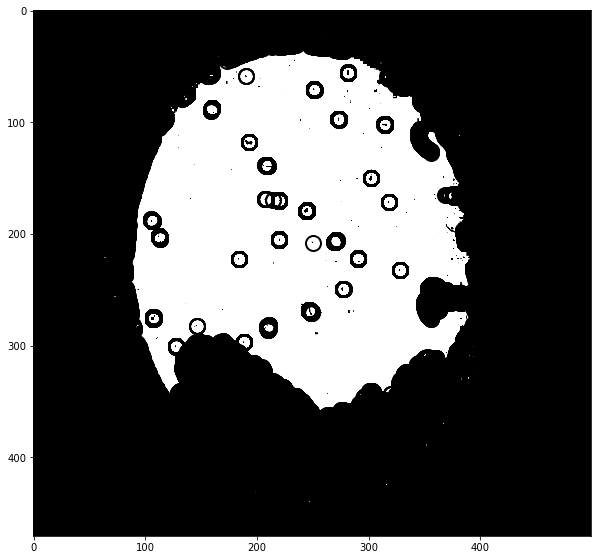

In [55]:
tp.annotate(f,binary_frames[0],color='black');

In [27]:
t = tp.link(f, 30, memory=3000)

Frame 4023: 46 trajectories present.


In [56]:
t.head(50)

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
0,31.164895,231.729580,13043.225868,6.705206,0.476094,104.893075,-23066.0,16.069294,0,0
28,249.207547,277.353286,1401.918752,2.507244,0.141692,121.311122,-94118.0,-0.167333,0,1
29,250.096673,369.538748,4660.900992,2.918160,0.068957,215.258832,-89995.0,-0.177755,0,2
30,262.110950,85.058893,13211.054788,6.760449,0.440992,105.805189,-23908.0,-107.218786,0,3
31,268.815009,246.914834,2613.205742,4.762858,0.542719,121.311122,-92573.0,-0.171092,0,4
32,275.368476,106.928497,1747.609844,1.925681,0.264744,143.201850,-93718.0,-0.168290,0,5
33,283.062112,209.369565,1174.802442,3.964125,0.660829,62.935845,-94313.0,-0.166870,0,6
34,287.617476,391.387771,9561.687886,7.698265,0.261876,163.268352,-33098.0,-1.265283,0,7
35,296.591647,188.000000,393.121003,1.428903,0.060163,56.551049,-95323.0,-0.164514,0,8
36,300.664430,127.000000,407.714823,1.428380,0.043342,58.375277,-95302.0,-0.164562,0,9


In [100]:
df=t[t['particle']==0]
df

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
0,31.164895,231.729580,13043.225868,6.705206,0.476094,104.893075,-23066.0,16.069294,0,0
52,30.993580,225.858328,12585.248941,6.522784,0.398764,110.755275,-25007.0,-5.824814,1,0
104,31.414882,226.861776,12818.843166,6.531152,0.432405,105.286392,-26873.0,-3.482600,2,0
156,30.772314,225.976057,12136.547657,6.584243,0.379014,111.268546,-25666.0,-4.433053,3,0
208,31.053932,223.822681,12613.466470,6.633354,0.465937,102.959569,-24454.0,-15.912506,4,0
...,...,...,...,...,...,...,...,...,...,...
205561,31.292314,227.163813,12686.020852,6.505836,0.420900,103.589025,-21272.0,5.720226,4018,0
205613,31.958333,223.149644,12853.292332,6.511824,0.391565,112.603629,-24320.0,-9.900660,4019,0
205664,31.507158,227.984702,12956.249409,6.485217,0.446814,104.559206,-26424.0,-4.348022,4020,0
205766,31.234422,228.438906,12255.523991,6.399207,0.373522,109.351700,-23793.0,-12.695263,4022,0


In [101]:
df.drop(df.columns[[0,1,4,5,6,7]], axis=1, inplace=True)

C:\Users\rohan\AppData\Local\Temp\ipykernel_33016\2399389380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df.columns[[0,1,4,5,6,7]], axis=1, inplace=True)


In [102]:

df.reset_index(drop=True, inplace=True)
df

,mass,size,frame,particle
0,13043.225868,6.705206,0,0
1,12585.248941,6.522784,1,0
2,12818.843166,6.531152,2,0
3,12136.547657,6.584243,3,0
4,12613.466470,6.633354,4,0
...,...,...,...,...
2534,12686.020852,6.505836,4018,0
2535,12853.292332,6.511824,4019,0
2536,12956.249409,6.485217,4020,0
2537,12255.523991,6.399207,4022,0


In [103]:
df['Radius in um']=df['size']*2.227*2
df['Diameter']=df['Radius in um']*2

C:\Users\rohan\AppData\Local\Temp\ipykernel_33016\2493922949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Radius in um']=df['size']*2.227*2
C:\Users\rohan\AppData\Local\Temp\ipykernel_33016\2493922949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Diameter']=df['Radius in um']*2


In [104]:

df['Time in sec']=df['frame']*4
df

C:\Users\rohan\AppData\Local\Temp\ipykernel_33016\3753463415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time in sec']=df['frame']*4


,mass,size,frame,particle,Radius in um,Diameter,Time in sec
0,13043.225868,6.705206,0,0,29.864988,59.729977,0
1,12585.248941,6.522784,1,0,29.052479,58.104957,4
2,12818.843166,6.531152,2,0,29.089752,58.179504,8
3,12136.547657,6.584243,3,0,29.326216,58.652433,12
4,12613.466470,6.633354,4,0,29.544959,59.089917,16
...,...,...,...,...,...,...,...
2534,12686.020852,6.505836,4018,0,28.976996,57.953991,16072
2535,12853.292332,6.511824,4019,0,29.003662,58.007324,16076
2536,12956.249409,6.485217,4020,0,28.885155,57.770310,16080
2537,12255.523991,6.399207,4022,0,28.502070,57.004140,16088


In [109]:
df['-dR/dT in um/s']=df['Radius in um']*0
for i in range(len(df['Radius in um'])-100):
    df['-dR/dT in um/s'][i]=(df['Radius in um'][i]-df['Radius in um'][i+1])


C:\Users\rohan\AppData\Local\Temp\ipykernel_33016\3700226945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['-dR/dT in um/s']=df['Radius in um']*0
C:\Users\rohan\AppData\Local\Temp\ipykernel_33016\3700226945.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['-dR/dT in um/s'][i]=(df['Radius in um'][i]-df['Radius in um'][i+1])


In [110]:
df

,mass,size,frame,particle,Radius in um,Diameter,Time in sec,-dR/dT in um/s
0,13043.225868,6.705206,0,0,29.864988,59.729977,0,0.812510
1,12585.248941,6.522784,1,0,29.052479,58.104957,4,-0.037273
2,12818.843166,6.531152,2,0,29.089752,58.179504,8,-0.236464
3,12136.547657,6.584243,3,0,29.326216,58.652433,12,-0.218742
4,12613.466470,6.633354,4,0,29.544959,59.089917,16,-0.662559
...,...,...,...,...,...,...,...,...
2534,12686.020852,6.505836,4018,0,28.976996,57.953991,16072,0.000000
2535,12853.292332,6.511824,4019,0,29.003662,58.007324,16076,0.000000
2536,12956.249409,6.485217,4020,0,28.885155,57.770310,16080,0.000000
2537,12255.523991,6.399207,4022,0,28.502070,57.004140,16088,0.000000
